In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ClimateData.csv')
df

id building_class  floor_area  year_built  precipitation_inches  \
0          0     Commercial     61242.0      1942.0                 16.59   
1          1     Commercial    274000.0      1955.0                 16.59   
2          2     Commercial    280025.0      1951.0                 16.59   
3          3     Commercial     55325.0      1980.0                 16.59   
4          4     Commercial     66000.0      1985.0                 16.59   
...      ...            ...         ...         ...                   ...   
75752  75752     Commercial     20410.0      1995.0                 45.03   
75753  75753    Residential     40489.0      1910.0                 45.03   
75754  75754     Commercial     28072.0      1917.0                106.32   
75755  75755     Commercial     53575.0      2012.0                106.32   
75756  75756    Residential     23888.0      1974.0                107.69   

       snowfall_inches   avg_temp  days_with_fog  site_eui  
0                  0.0  56.972603            NaN    248.68  
1                  0.0  56.972603           12.0     26.50  
2                  0.0  56.972603           12.0     24.69  
3                  0.0  56.972603           12.0     48.41  
4                  0.0  56.972603            NaN      3.90  
...                ...        ...            ...       ...  
75752              1.4  55.147541            NaN    132.92  
75753              1.4  55.147541            NaN     39.48  
75754             36.6  47.911202            NaN     48.40  
75755             36.6  47.911202            NaN    592.02  
75756             28.8  49.127397            NaN     29.15  

[75757 rows x 9 columns]

In [9]:
#question 1
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    75757 non-null  int64  
 1   building_class        75757 non-null  object 
 2   floor_area            75757 non-null  float64
 3   year_built            73920 non-null  float64
 4   precipitation_inches  75757 non-null  float64
 5   snowfall_inches       75757 non-null  float64
 6   avg_temp              75757 non-null  float64
 7   days_with_fog         29961 non-null  float64
 8   site_eui              75757 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.2+ MB


In [13]:
#question 2 For the categorical variable in the dataset, identify the number of unique values
building = 'building_class'
df[building].nunique()

2

In [14]:
#question 3
df.describe()

id    floor_area    year_built  precipitation_inches  \
count  75757.000000  7.575700e+04  73920.000000          75757.000000   
mean   37878.000000  1.659839e+05   1952.306764             42.430651   
std    21869.306509  2.468758e+05     37.053619             10.592205   
min        0.000000  9.430000e+02      0.000000              0.000000   
25%    18939.000000  6.237900e+04   1927.000000             39.350000   
50%    37878.000000  9.136700e+04   1951.000000             42.170000   
75%    56817.000000  1.660000e+05   1977.000000             46.320000   
max    75756.000000  6.385382e+06   2015.000000            107.690000   

       snowfall_inches      avg_temp  days_with_fog      site_eui  
count     75757.000000  75757.000000   29961.000000  75757.000000  
mean         29.136379     56.176705     109.142051     82.584707  
std          17.810894      2.241940      50.699751     58.255413  
min           0.000000     44.512329      12.000000      1.000000  
25%           9.600000     55.147541      88.000000     54.530000  
50%          31.600000     56.835616     104.000000     75.290000  
75%          49.100000     57.215847     131.000000     97.280000  
max         127.300000     77.245205     311.000000    997.870000

In [15]:
#question 4
df.isnull().sum()

id                          0
building_class              0
floor_area                  0
year_built               1837
precipitation_inches        0
snowfall_inches             0
avg_temp                    0
days_with_fog           45796
site_eui                    0
dtype: int64

In [7]:
#question 5
#remove?

In [16]:
#question 6
duplicates=df.duplicated().sum()
print('Number of duplicate entries:',duplicates)
duplicates=df[df.duplicated(keep=False)]
print(duplicates)

Number of duplicate entries: 0
Empty DataFrame
Columns: [id, building_class, floor_area, year_built, precipitation_inches, snowfall_inches, avg_temp, days_with_fog, site_eui]
Index: []


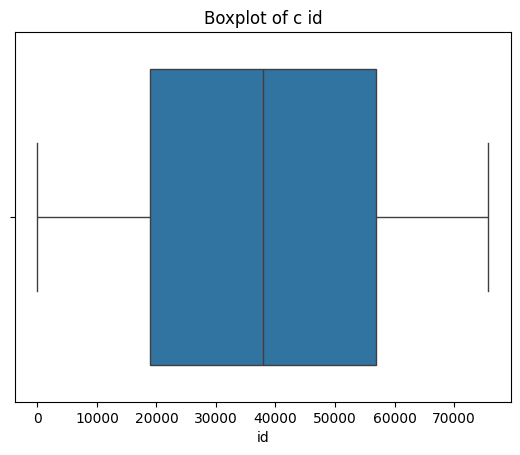

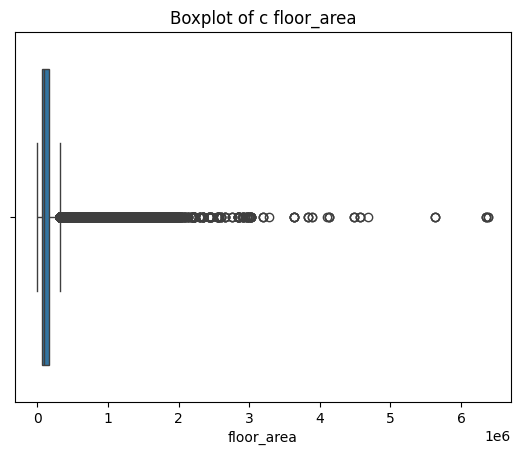

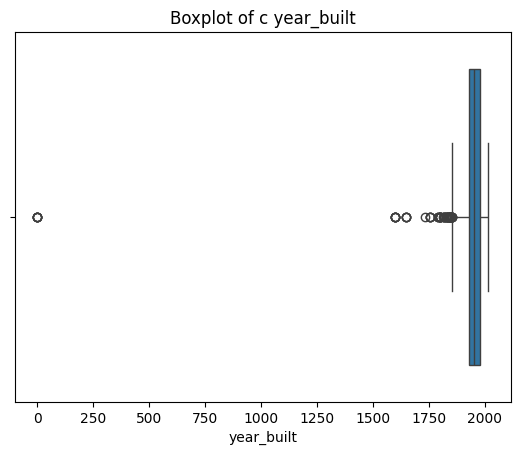

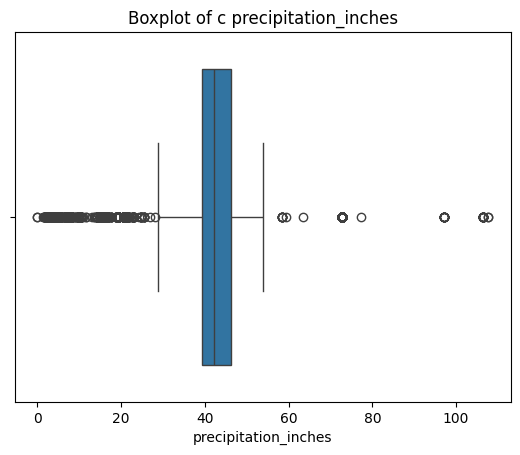

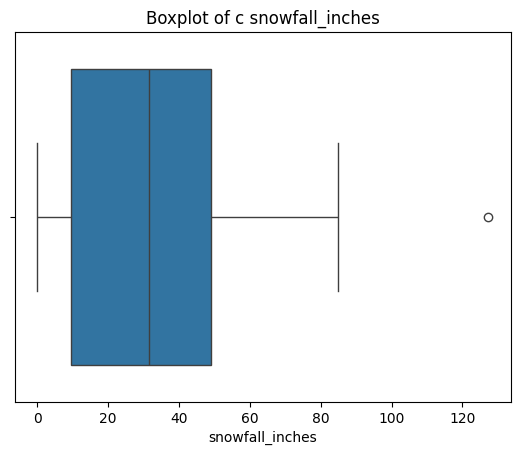

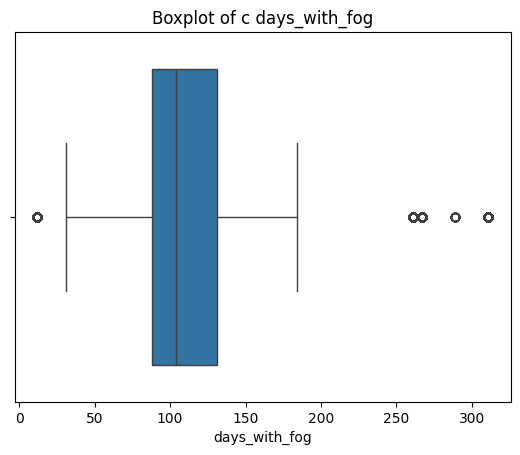

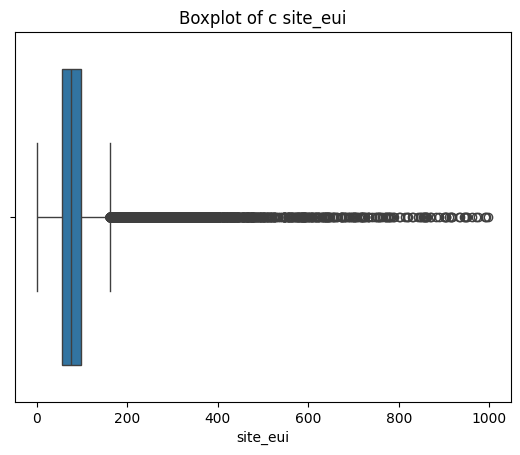

In [21]:
#question 7
for col in df.select_dtypes(include=['number']).columns:
  sns.boxplot(x=df[col])
  plt.title(f"Boxplot of c {col}")
  plt.show()

<Figure size 1200x800 with 0 Axes>

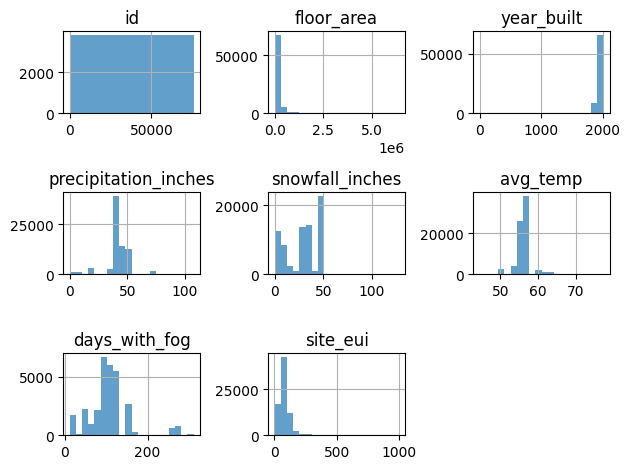

In [24]:
#question 8
plt.figure(figsize=(12, 8))  # Set the figure size
df[['id','building_class', 'floor_area', 'year_built',
       'precipitation_inches', 'snowfall_inches', 'avg_temp', 'days_with_fog',
       'site_eui']].hist(bins=20, alpha=0.7)  # Specify variables for histograms
plt.tight_layout()  # Adjust layout
plt.show()

In [47]:
#question 9 Do you need feature scaling in this dataset?
#yes? some datasets are a lot bigger than the rest

In [38]:
#question 10 Use the z-score methods to detect outliers in dataset
from scipy import stats

for col in df.select_dtypes(include=['number']).columns:
    z_scores_column = stats.zscore(df[col])

# Display the z-scores for the chosen column
print("Z-scores for column '{}':".format(col)
print(z_scores_column)


Z-scores for column 'floor_area':
0        2.851175
1       -0.962744
2       -0.993815
3       -0.586640
4       -1.350694
           ...   
75752    0.864051
75753   -0.739931
75754   -0.586811
75755    8.744915
75756   -0.917255
Name: site_eui, Length: 75757, dtype: float64


In [44]:
#question 11 Identify the man and min values for each variable
max=df.max()
min=df.min()
print(max)
print(min)

id                            75756
building_class          Residential
floor_area                6385382.0
year_built                   2015.0
precipitation_inches         107.69
snowfall_inches               127.3
avg_temp                  77.245205
days_with_fog                 311.0
site_eui                     997.87
dtype: object
id                               0
building_class          Commercial
floor_area                   943.0
year_built                     0.0
precipitation_inches           0.0
snowfall_inches                0.0
avg_temp                 44.512329
days_with_fog                 12.0
site_eui                       1.0
dtype: object


In [46]:
#quesiton 12 encode the categorical variable
categorical_variable = 'building_class'

# Perform One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=[categorical_variable], prefix=[categorical_variable])

# Print the encoded dataframe
print("Encoded DataFrame:")
print(df_encoded)

Encoded DataFrame:
          id  floor_area  year_built  precipitation_inches  snowfall_inches  \
0          0     61242.0      1942.0                 16.59              0.0   
1          1    274000.0      1955.0                 16.59              0.0   
2          2    280025.0      1951.0                 16.59              0.0   
3          3     55325.0      1980.0                 16.59              0.0   
4          4     66000.0      1985.0                 16.59              0.0   
...      ...         ...         ...                   ...              ...   
75752  75752     20410.0      1995.0                 45.03              1.4   
75753  75753     40489.0      1910.0                 45.03              1.4   
75754  75754     28072.0      1917.0                106.32             36.6   
75755  75755     53575.0      2012.0                106.32             36.6   
75756  75756     23888.0      1974.0                107.69             28.8   

        avg_temp  days_with_fog 